# 图片相似度搜索

导入库

In [1]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
from simsearch import getAllImg, simsearch
from helper import showsim
from time import time

In [2]:
allimgs = getAllImg()

In [3]:
def testSim(img):
    start_time = time()
    simimgs = simsearch(img, allimgs, threshold = 5)
    cost_time = time() - start_time

    return cost_time, simimgs

simdata = dict()
for token, path in [(img['token'], img['path']) for img in allimgs]:
    cost_time, simimgs = testSim(path)
    simdata[token] = cost_time, simimgs

In [4]:
import pandas as pd

items = [{'cost_time': simdata[token][0], 'sim_imgs':  ', '.join([sim['path'] for sim in simdata[token][1] ]), 'sims':  ', '.join([str(sim['sim']) for sim in simdata[token][1] ])} for token in simdata]

index = [token for token in simdata]

df = pd.DataFrame(items, index=index)

def sortf(x):
    xx = x.split('-')
    label = xx[0]
    num = int(xx[1])
    if label == 'crop':
        num += 3000
    elif label == 'rotate':
        num += 2000
    elif label == 'filter':
        num += 1000
    return num

df = df.loc[sorted(df.index, key=sortf)]

In [5]:
df['cost_time'].describe()

count    48.000000
mean      1.380250
std       0.146238
min       0.975390
25%       1.325233
50%       1.440174
75%       1.474049
max       1.613798
Name: cost_time, dtype: float64

In [6]:
# print('Cost time = {}s'.format(cost_time))
# showsim(simimgs)
pd.set_option('display.max_colwidth',120)
df.head(12)

cost_time  \
origin-1    1.448126   
origin-2    1.458099   
origin-3    1.396265   
origin-4    1.456104   
origin-5    1.439204   
origin-6    1.370334   
origin-7    1.424190   
origin-8    1.543868   
origin-9    1.556835   
origin-10   1.353417   
origin-11   1.392288   
origin-12   1.355374   

                                                                                       sim_imgs  \
origin-1                          images/origin/1.jpg, images/filter/1.jpg, images/rotate/1.jpg   
origin-2       images/origin/2.jpg, images/filter/2.jpg, images/rotate/2.jpg, images/crop/2.jpg   
origin-3       images/origin/3.jpg, images/filter/3.jpg, images/rotate/3.jpg, images/crop/3.jpg   
origin-4       images/origin/4.jpg, images/filter/4.jpg, images/rotate/4.jpg, images/crop/4.jpg   
origin-5                          images/origin/5.jpg, images/filter/5.jpg, images/rotate/5.jpg   
origin-6                          images/origin/6.jpg, images/filter/6.jpg, images/rotate/6.jpg   
origin-7                          images/origin/7.jpg, images/filter/7.jpg, images/rotate/7.jpg   
origin-8       images/origin/8.jpg, images/filter/8.jpg, images/rotate/8.jpg, images/crop/8.jpg   
origin-9       images/origin/9.jpg, images/filter/9.jpg, images/rotate/9.jpg, images/crop/9.jpg   
origin-10  images/origin/10.jpg, images/filter/10.jpg, images/rotate/10.jpg, images/crop/10.jpg   
origin-11  images/origin/11.jpg, images/filter/11.jpg, images/rotate/11.jpg, images/crop/11.jpg   
origin-12  images/origin/12.jpg, images/filter/12.jpg, images/rotate/12.jpg, images/crop/12.jpg   

                               sims  
origin-1          1.0, 0.854, 0.776  
origin-2    1.0, 0.766, 0.74, 0.012  
origin-3   1.0, 0.858, 0.778, 0.018  
origin-4    1.0, 0.86, 0.784, 0.006  
origin-5           1.0, 0.77, 0.736  
origin-6          1.0, 0.716, 0.684  
origin-7          1.0, 0.488, 0.456  
origin-8   1.0, 0.826, 0.784, 0.018  
origin-9   1.0, 0.846, 0.836, 0.014  
origin-10  1.0, 0.686, 0.634, 0.006  
origin-11    1.0, 0.87, 0.814, 0.01  
origin-12  1.0, 0.398, 0.378, 0.028

In [7]:
df.head(12).describe()

cost_time
count  12.000000
mean    1.432842
std     0.066352
min     1.353417
25%     1.386800
50%     1.431697
75%     1.456603
max     1.556835

In [8]:
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np

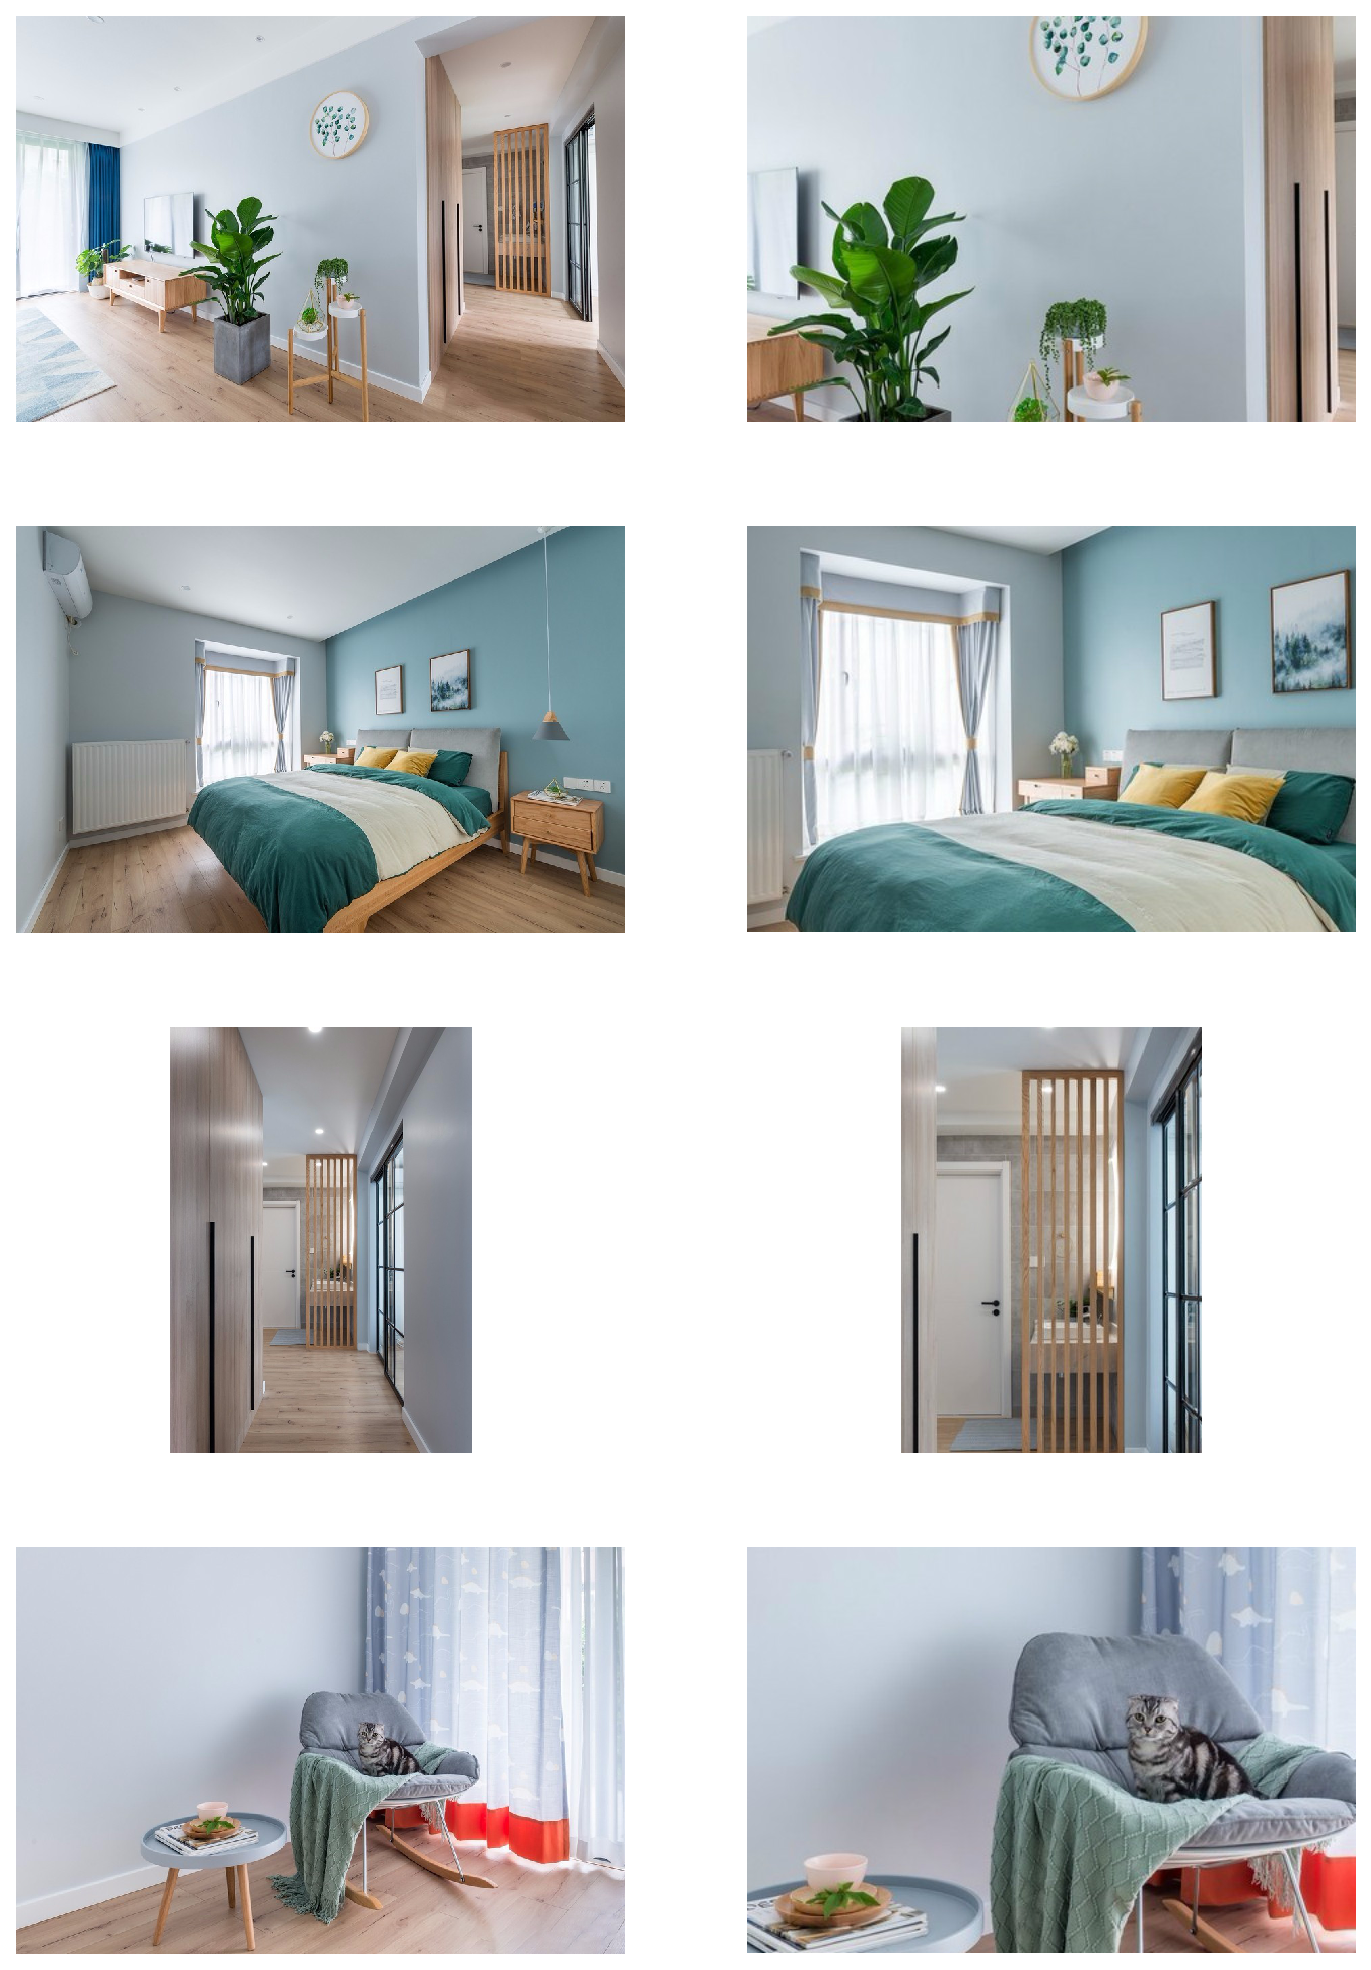

In [9]:
fig, axs = plt.subplots(4, 2, figsize=(12, 18))

imgs = [['images/origin/1.jpg', 'images/crop/1.jpg'],
        ['images/origin/5.jpg', 'images/crop/5.jpg'],
        ['images/origin/6.jpg', 'images/crop/6.jpg'],
        ['images/origin/7.jpg', 'images/crop/7.jpg']]

for i in range(len(imgs)):
    for j in range(len(imgs[i])):
        im = Image.open(imgs[i][j])
        ax = axs[i][j]
        ax.imshow(np.asarray(im))
        ax.spines['top'].set_visible(False)
        ax.spines['right'].set_visible(False)
        ax.spines['left'].set_visible(False)
        ax.spines['bottom'].set_visible(False)
        ax.tick_params(axis='both', length=0)
        ax.set_xticklabels('')
        ax.set_yticklabels('')
        ax.set_axis_off

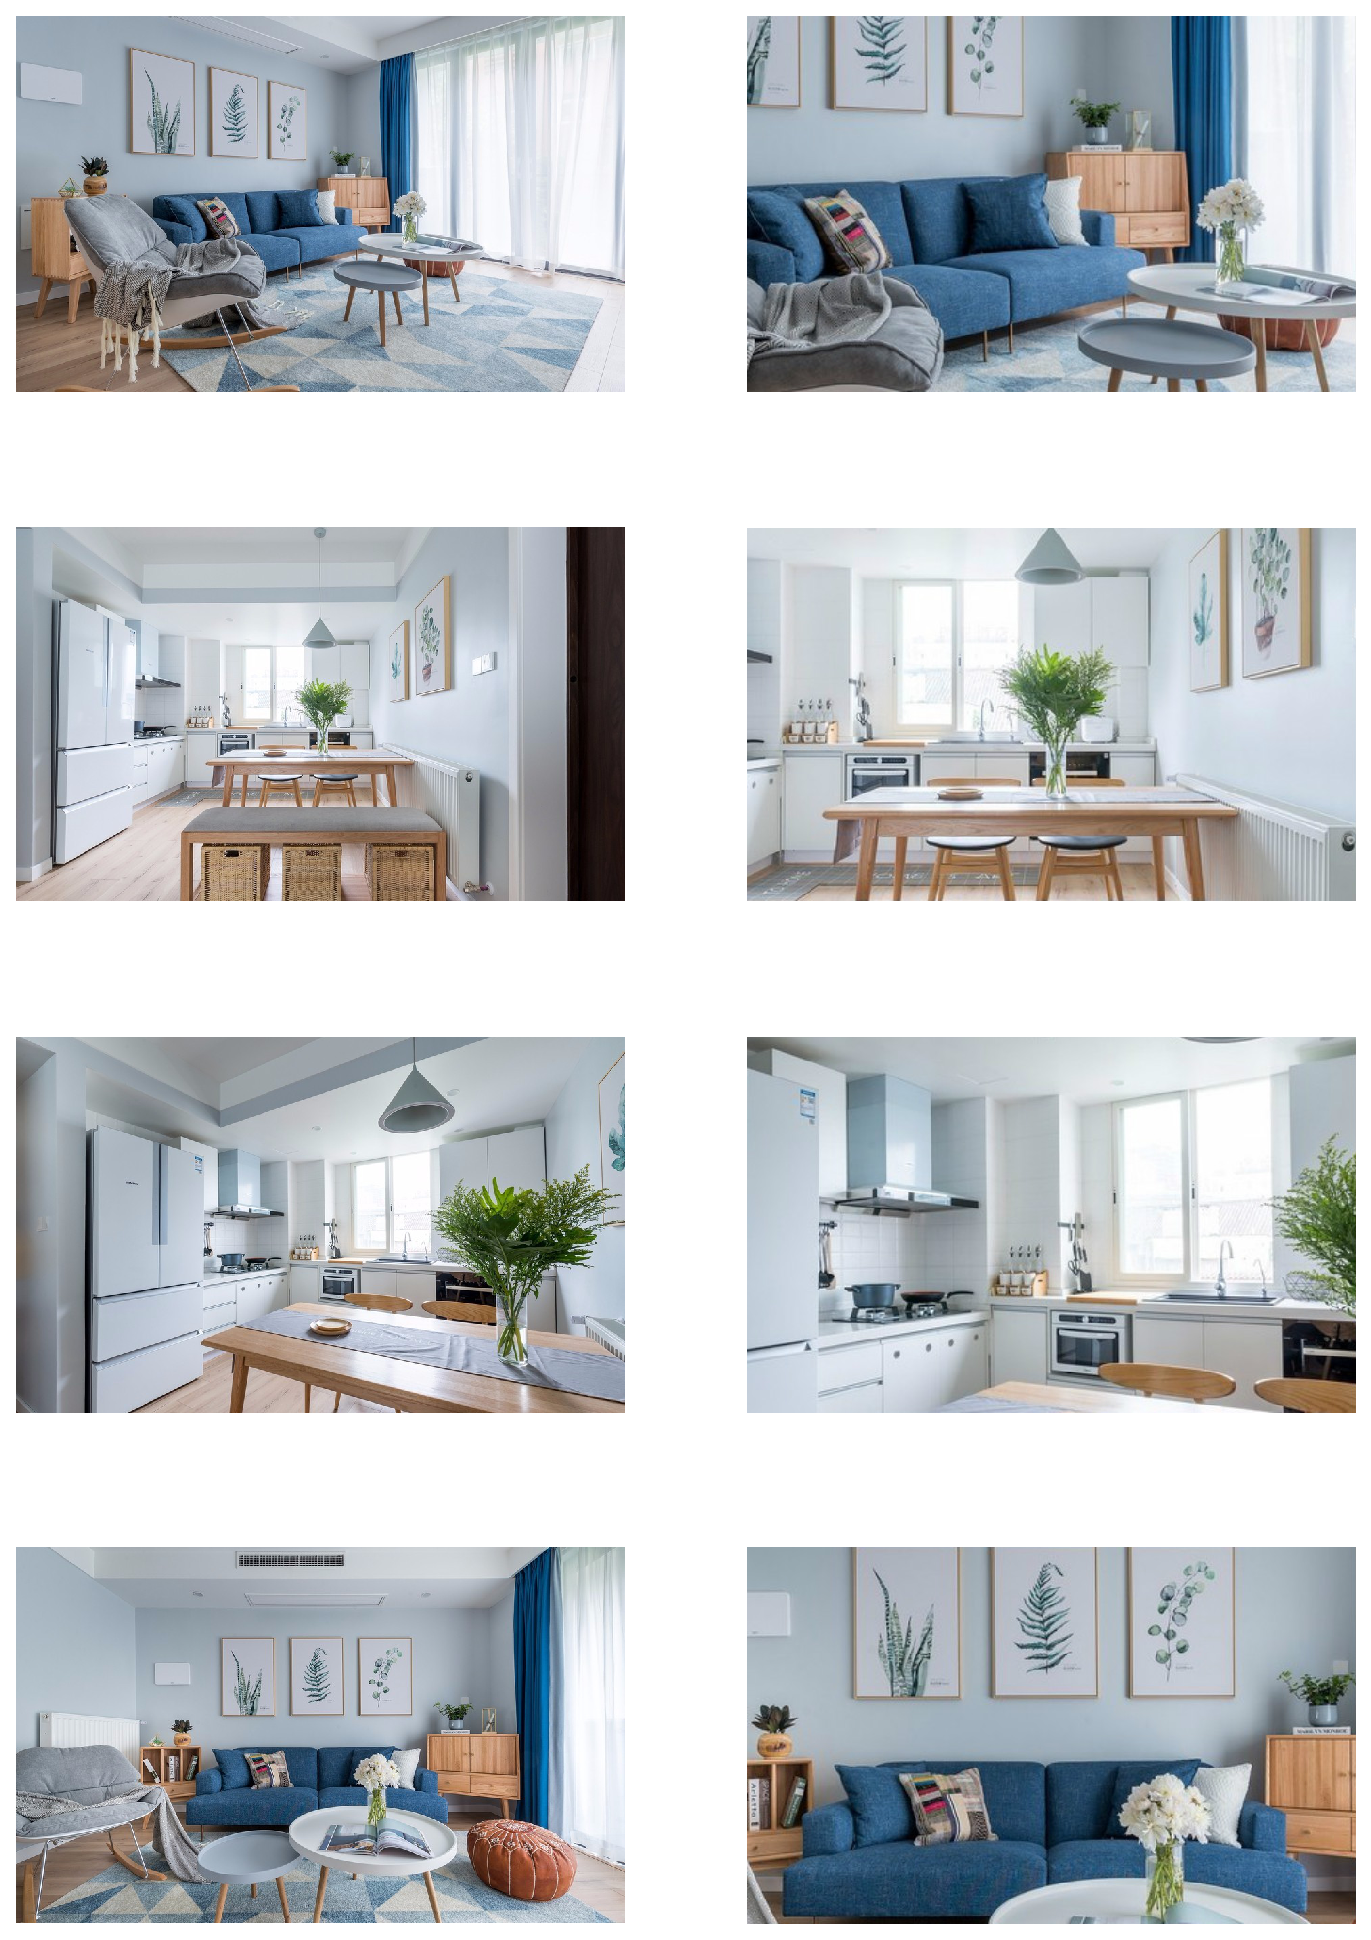

In [10]:
fig, axs = plt.subplots(4, 2, figsize=(12, 18))

imgs = [['images/origin/2.jpg', 'images/crop/2.jpg'],
        ['images/origin/3.jpg', 'images/crop/3.jpg'],
        ['images/origin/4.jpg', 'images/crop/4.jpg'],
        ['images/origin/8.jpg', 'images/crop/8.jpg']]

for i in range(len(imgs)):
    for j in range(len(imgs[i])):
        im = Image.open(imgs[i][j])
        ax = axs[i][j]
        ax.imshow(np.asarray(im))
        ax.spines['top'].set_visible(False)
        ax.spines['right'].set_visible(False)
        ax.spines['left'].set_visible(False)
        ax.spines['bottom'].set_visible(False)
        ax.tick_params(axis='both', length=0)
        ax.set_xticklabels('')
        ax.set_yticklabels('')
        ax.set_axis_off